In [1]:
import xarray as xr
norm_nox = r"evolution/norm_NOX.nc"

ds = xr.open_dataset(norm_nox)
display(ds)

<xarray.Dataset> Size: 588B
Dimensions:       (time: 21)
Coordinates:
  * time          (time) int64 168B 2020 2025 2030 2035 ... 2105 2110 2115 2120
Data variables:
    fuel          (time) float32 84B ...
    EI_CO2        (time) float32 84B ...
    EI_H2O        (time) float32 84B ...
    EI_NOx        (time) float32 84B ...
    dis_per_fuel  (time) float32 84B ...
Attributes:
    Title:       Time normalization example
    Convention:  CF-XXX
    Type:        norm
    Author:      Stefan Völk
    Contact:     stefan.voelk@dlr.de

In [11]:
CurTec_fuel = [
    16.26,
    16.90,
    17.57,
    18.27,
    19.00,
    19.76,
    20.56,
    21.39,
    22.25,
    23.16,
    24.10,
    25.08,
    26.11,
    27.18,
    28.29,
    29.46,
    30.67,
    31.94,
    33.26,
    34.64,
    36.09,
    37.59,
    39.16,
    40.79,
    42.50,
    44.28,
    46.14,
    48.08,
    50.10,
    52.21,
    54.41,
    56.71,
    63.08,
    67.57,
    69.71,
    74.65,
    80.47,
    84.73,
    95.34,
    106.18,
    107.28,
    108.42,
    108.82,
    111.53,
    117.80,
    123.93,
    129.46,
    139.35,
    147.06,
    150.49,
    158.02,
    151.39,
    155.68,
    154.70,
    163.93,
    172.58,
    183.62,
    191.04,
    191.90,
    200.89,
    214.48,
    204.79,
    206.56,
    210.15,
    238.19,
    253.97,
    265.71,
    283.06,
    284.15,
    276.37,
    293.27,
    307.21,
    321.23,
    337.41,
    356.04,
    381.12,
    407.52,
    437.94,
    473.40,
    498.10,
    522.39,
    546.60,
    570.11,
    592.66,
    613.93,
    633.64,
    652.90,
    672.37,
    692.02,
    711.85,
    731.83,
    752.56,
    773.38,
    794.28,
    815.23,
    836.20,
    856.70,
    876.96,
    896.91,
    916.54,
    935.79,
    954.64,
    972.96,
    990.70,
    1007.84,
    1024.31,
    1038.93,
    1053.25,
    1067.24,
    1080.89,
    1094.17,
    1113.09,
    1125.51,
    1137.98,
    1150.50,
    1163.05,
    1175.65,
    1188.29,
    1200.96,
    1213.67,
    1226.41,
    1239.19,
    1251.99,
    1264.83,
    1277.69,
    1290.58,
    1303.49,
    1316.42,
    1329.37,
    1342.34,
    1355.33,
    1368.32,
    1381.33,
    1394.35,
    1407.38,
    1420.41,
    1433.56,
    1446.72,
    1459.87,
    1473.03,
    1486.18,
    1499.33,
    1512.47,
    1525.60,
    1538.71,
    1551.82,
    1564.90,
    1577.97,
    1591.01,
    1604.03,
    1617.03,
    1630.00,
    1642.93,
    1655.83,
    1668.70,
    1681.53,
    1694.32,
    1707.06,
    1719.76,
    1732.41,
    1745.01,
]


In [12]:
import pandas as pd
import numpy as np

# Read the file with no header, then manually build one
df_raw = pd.read_excel(r"C:\Users\atzeh\OneDrive\Documenten\TU\MASTER\Thesis\Grewe_et_al_data_210322.xlsx", sheet_name='Fig.1 Emissions',header=None, skiprows=[2,3])

# Combine first two rows into one header
new_header = df_raw.iloc[0] + "_" + df_raw.iloc[1].fillna("")
df = df_raw[2:].copy()
df.columns = new_header

# Reset index
df = df.reset_index(drop=True)

df.pop(np.nan)
df['CurTec_Fuel'] = CurTec_fuel
df = df.rename(columns={"Scenario_Quantity": "Year"})
df = df[df["Year"] >= 2020].reset_index(drop=True)
df = df.apply(pd.to_numeric, errors="coerce")

print(df.head())
df

   Year  All Scenarios_RPK  All Scenarios_Flown km     CurTec_CO2  CurTec_NOx  \
0  2020      9080000000000            112000000000  1640000000000  7470000000   
1  2021      9540000000000            117000000000  1720000000000  7820000000   
2  2022      9990000000000            122000000000  1790000000000  8150000000   
3  2023     10400000000000            127000000000  1860000000000  8470000000   
4  2024     10800000000000            131000000000  1930000000000  8780000000   

   BAU/CORSIA_Fuel        BAU_CO2  CORSIA_CO2 Emission  CORSIA_NOx Emission  \
0     506000000000  1590000000000        1570000000000           7240000000   
1     525000000000  1650000000000        1570000000000           7500000000   
2     542000000000  1700000000000        1570000000000           7750000000   
3     558000000000  1750000000000        1570000000000           7980000000   
4     573000000000  1800000000000        1570000000000           8190000000   

    FP2050_Fuel  FP2050_CO2 Emission  

,Year,All Scenarios_RPK,All Scenarios_Flown km,CurTec_CO2,CurTec_NOx,BAU/CORSIA_Fuel,BAU_CO2,CORSIA_CO2 Emission,CORSIA_NOx Emission,FP2050_Fuel,FP2050_CO2 Emission,FP2050_NOx Emission,FP2050-cont_Fuel,FP2050-cont_CO2-Emission,FP2050-cont_NOx Emission,CurTec_Fuel
0,2020,9080000000000,112000000000,1640000000000,7470000000,506000000000,1590000000000,1570000000000,7240000000,506000000000,1.590024e+12,7.241193e+09,494000000000,1.550115e+12,7.059439e+09,522.39
1,2021,9540000000000,117000000000,1720000000000,7820000000,525000000000,1650000000000,1570000000000,7500000000,525000000000,1.647529e+12,7.503078e+09,499000000000,1.565861e+12,7.021185e+09,546.60
2,2022,9990000000000,122000000000,1790000000000,8150000000,542000000000,1700000000000,1570000000000,7750000000,542000000000,1.701852e+12,7.750474e+09,502000000000,1.576893e+12,6.959909e+09,570.11
3,2023,10400000000000,127000000000,1860000000000,8470000000,558000000000,1750000000000,1570000000000,7980000000,558000000000,1.752263e+12,7.980052e+09,504000000000,1.582849e+12,6.875042e+09,592.66
4,2024,10800000000000,131000000000,1930000000000,8780000000,573000000000,1800000000000,1570000000000,8190000000,573000000000,1.798017e+12,8.188421e+09,504000000000,1.583413e+12,6.766290e+09,613.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2096,30700000000000,363000000000,5320000000000,24200000000,1020000000000,3190000000000,1570000000000,14500000000,367000000000,1.152708e+12,2.092495e+09,368000000000,1.154204e+12,2.095212e+09,1694.32
77,2097,31000000000000,366000000000,5360000000000,24400000000,1020000000000,3210000000000,1570000000000,14600000000,369000000000,1.158157e+12,2.102386e+09,369000000000,1.159660e+12,2.105116e+09,1707.06
78,2098,31300000000000,368000000000,5400000000000,24600000000,1030000000000,3220000000000,1570000000000,14700000000,371000000000,1.163642e+12,2.112344e+09,371000000000,1.165153e+12,2.115087e+09,1719.76
79,2099,31500000000000,371000000000,5440000000000,24800000000,1030000000000,3240000000000,1570000000000,14700000000,372000000000,1.169165e+12,2.122370e+09,373000000000,1.170683e+12,2.125125e+09,1732.41


In [3]:
df['CurTec_NOx'].values/df['Year'].values


array([ 3698019.8019802 ,  3869371.5982187 ,  4030662.71018793,
        4186851.21107266,  4337944.66403162,  4474074.07407407,
        4610069.10167818,  4740996.54662062,  4881656.80473373,
        5027106.94923608,  5172413.79310345,  5317577.54800591,
        5462598.42519685,  5607476.63551402,  5752212.38938053,
        5896805.8968059 ,  6041257.36738703,  6136475.20864016,
        6280667.32090285,  6424717.99901913,  6568627.45098039,
        6712395.88437041,  6807051.90989226,  6950562.89769946,
        7045009.78473581,  7139364.30317848,  7282502.44379277,
        7376648.75427455,  7470703.125     ,  7564665.69058077,
        7609756.09756098,  7752315.94344222,  7846003.89863548,
        7939600.58451047,  8033106.13437196,  8077858.88077859,
        8171206.22568093,  8264462.80991735,  8357628.76579203,
        8450704.22535211,  8495145.63106796,  8588064.04657933,
        8680892.33753637,  8773630.63499758,  8866279.06976744,
        8958837.7723971 ,  9002904.16263

In [13]:
df.keys()

Index(['Year', 'All Scenarios_RPK', 'All Scenarios_Flown km', 'CurTec_CO2',
       'CurTec_NOx', 'BAU/CORSIA_Fuel', 'BAU_CO2', 'CORSIA_CO2 Emission',
       'CORSIA_NOx Emission', 'FP2050_Fuel', 'FP2050_CO2 Emission',
       'FP2050_NOx Emission', 'FP2050-cont_Fuel', 'FP2050-cont_CO2-Emission',
       'FP2050-cont_NOx Emission', 'CurTec_Fuel'],
      dtype='object')

In [15]:
SA_dict = {"CurTec": {'co2': 'CurTec_CO2', 'nox': 'CurTec_NOx', 'fuel': 'CurTec_Fuel', 'name': 'GCurTec'},
           "BAU": {'co2': 'BAU_CO2', 'nox': 'CORSIA_NOx Emission', 'fuel': 'BAU/CORSIA_Fuel', 'name': 'GBAU'},
           "FP2050": {'co2': 'FP2050_CO2 Emission', 'nox': 'FP2050_NOx Emission', 'fuel': 'FP2050_Fuel', 'name': 'GFP2050'},
           "FP2050cont": {'co2': 'FP2050-cont_CO2-Emission', 'nox': 'FP2050-cont_NOx Emission', 'fuel': 'FP2050-cont_Fuel', 'name': 'GFP2050cont'},}

In [17]:
for scenario in SA_dict.keys():
    print(scenario)
    print(SA_dict[scenario]['co2'])
    FUEL_ARR = df[SA_dict[scenario]['co2']].values / 1e9
    print(FUEL_ARR)

CurTec
CurTec_CO2
[1640. 1720. 1790. 1860. 1930. 1990. 2050. 2110. 2170. 2240. 2300. 2360.
 2430. 2490. 2560. 2630. 2690. 2750. 2820. 2880. 2940. 3000. 3060. 3110.
 3160. 3220. 3260. 3310. 3350. 3390. 3440. 3500. 3530. 3570. 3610. 3650.
 3690. 3730. 3770. 3810. 3850. 3890. 3930. 3970. 4010. 4050. 4090. 4130.
 4170. 4210. 4260. 4300. 4340. 4380. 4420. 4460. 4500. 4540. 4580. 4630.
 4670. 4710. 4750. 4790. 4830. 4870. 4910. 4950. 5000. 5040. 5080. 5120.
 5160. 5200. 5240. 5280. 5320. 5360. 5400. 5440. 5480.]
BAU
BAU_CO2
[1590. 1650. 1700. 1750. 1800. 1840. 1880. 1910. 1950. 1990. 2030. 2070.
 2110. 2140. 2180. 2220. 2250. 2290. 2320. 2350. 2380. 2410. 2440. 2470.
 2490. 2510. 2530. 2540. 2560. 2570. 2590. 2610. 2620. 2630. 2650. 2660.
 2670. 2680. 2690. 2700. 2710. 2730. 2740. 2750. 2760. 2770. 2780. 2800.
 2810. 2820. 2830. 2850. 2860. 2870. 2880. 2900. 2910. 2920. 2940. 2950.
 2960. 2980. 2990. 3000. 3020. 3030. 3050. 3060. 3070. 3090. 3100. 3120.
 3130. 3150. 3160. 3180. 3190. 3210. 3

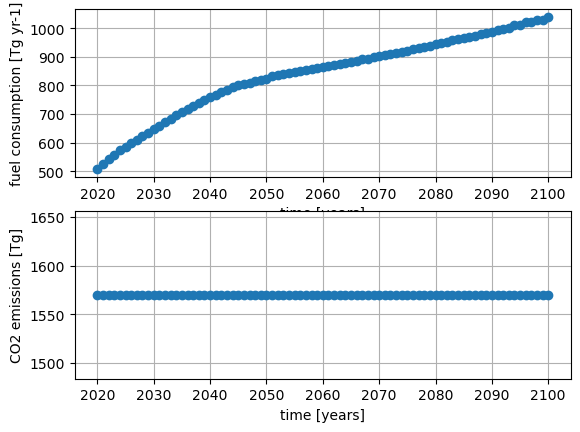

<xarray.Dataset> Size: 4kB
Dimensions:       (time: 81)
Coordinates:
  * time          (time) int64 648B 2020 2021 2022 2023 ... 2097 2098 2099 2100
Data variables:
    fuel          (time) float64 648B 506.0 525.0 542.0 ... 1.03e+03 1.04e+03
    EI_CO2        (time) float64 648B 3.103 2.99 2.897 ... 1.524 1.524 1.51
    EI_H2O        (time) float32 324B 1.25 1.25 1.25 1.25 ... 1.25 1.25 1.25
    EI_NOx        (time) float64 648B 0.01431 0.01429 0.0143 ... 0.01427 0.01423
    dis_per_fuel  (time) float64 648B 2.213e+08 2.229e+08 ... 3.596e+08
Attributes:
    Title:       Time normalization example
    Convention:  CF-XXX
    Type:        norm
    Author:      Stefan Völk
    Contact:     stefan.voelk@dlr.de

In [5]:
from create_time_evolution_adapted import create_time_normalization_xr, convert_xr_to_nc, plot_time_norm

NORM_TIME = df['Year'].values
FUEL_ARR = df['BAU/CORSIA_Fuel'].values/1e9
EI_CO2_ARR = df['CORSIA_CO2 Emission']/1e9/FUEL_ARR   
EI_H2O_ARR = 1.25 * np.ones(len(NORM_TIME), dtype="float32") # TODO H2O not defined by Grewe scenarios
EI_NOx_ARR = df['CORSIA_NOx Emission']/1e9/FUEL_ARR
for i in range(len(NORM_TIME)):
    if i in [5, 6, 7,8,9]:
        EI_NOx_ARR[i] = 0

DIS_PER_FUEL_ARR = df['All Scenarios_Flown km']/FUEL_ARR

norm_ds = create_time_normalization_xr(
    time_arr= NORM_TIME,
    fuel_arr= FUEL_ARR,
    ei_co2_arr= EI_CO2_ARR,
    ei_h2o_arr= EI_H2O_ARR,
    ei_nox_arr= EI_NOx_ARR,
    dis_per_fuel_arr= DIS_PER_FUEL_ARR
)
convert_xr_to_nc(norm_ds, "norm_bau_corsia_fuel", "../Scenario_Analysis/evolution/")
plot_time_norm(norm_ds)


In [6]:
import xarray as xr
norm_nox = r"evolution/norm_bau_corsia_fuel.nc"

ds = xr.open_dataset(norm_nox)
display(ds)

<xarray.Dataset> Size: 4kB
Dimensions:       (time: 81)
Coordinates:
  * time          (time) int64 648B 2020 2021 2022 2023 ... 2097 2098 2099 2100
Data variables:
    fuel          (time) float64 648B ...
    EI_CO2        (time) float64 648B ...
    EI_H2O        (time) float32 324B ...
    EI_NOx        (time) float64 648B ...
    dis_per_fuel  (time) float64 648B ...
Attributes:
    Title:       Time normalization example
    Convention:  CF-XXX
    Type:        norm
    Author:      Stefan Völk
    Contact:     stefan.voelk@dlr.de

In [7]:
# Is T/O som,uch higher

# pr = np.array([10,20,30,40,50,55,60])
# y = 0.212*pr**1.422
# y

In [8]:
sensitivity = np.array([0.73, 1, 0.86, 0.83, 0.43])
efficacy = sensitivity/0.73
efficacy

array([1.        , 1.36986301, 1.17808219, 1.1369863 , 0.5890411 ])

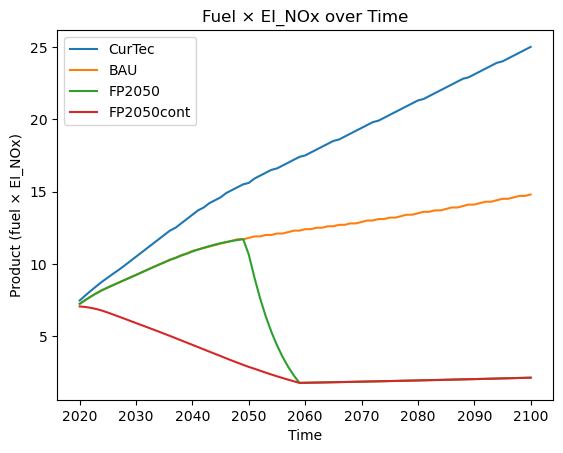

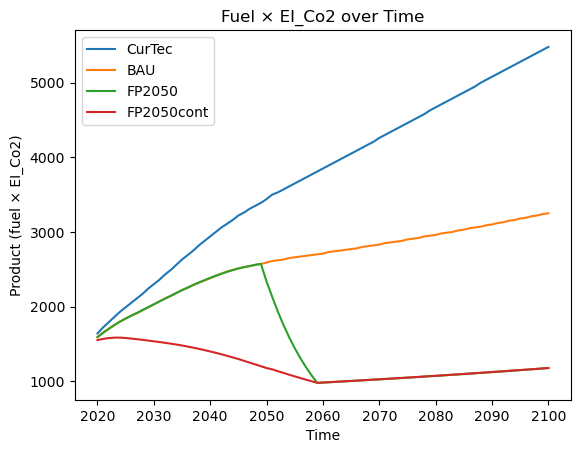

In [30]:
import xarray as xr
import matplotlib.pyplot as plt
for scenario in SA_dict.keys():
    ds = xr.open_dataset('evolution/'+ SA_dict[scenario]['name']+ '.nc')
    product = ds["fuel"] * ds["EI_NOx"]
    product.plot(x="time", label=scenario)
plt.title("Fuel × EI_NOx over Time")
plt.xlabel("Time")
plt.ylabel("Product (fuel × EI_NOx)")
plt.legend()
plt.show() 
for scenario in SA_dict.keys():
    ds = xr.open_dataset('evolution/'+ SA_dict[scenario]['name']+ '.nc')
    product = ds["fuel"] * ds["EI_CO2"]
    product.plot(x="time", label=scenario)
plt.title("Fuel × EI_Co2 over Time")
plt.xlabel("Time")
plt.ylabel("Product (fuel × EI_CO2)")
plt.legend()
plt.show()  
